# Neural Networks from scratch


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Exploration


In [2]:
df = pd.read_csv("data/ObesityDataSet_raw_and_data_sinthetic.csv")
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
# Check duplicates
df.duplicated().sum()

np.int64(24)

In [4]:
# Check missing values
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [5]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


## Data Preprocessing


In [6]:
# Remove duplicates
df = df.drop_duplicates()

In [7]:
df.duplicated().sum()

np.int64(0)

## Plot the initial data


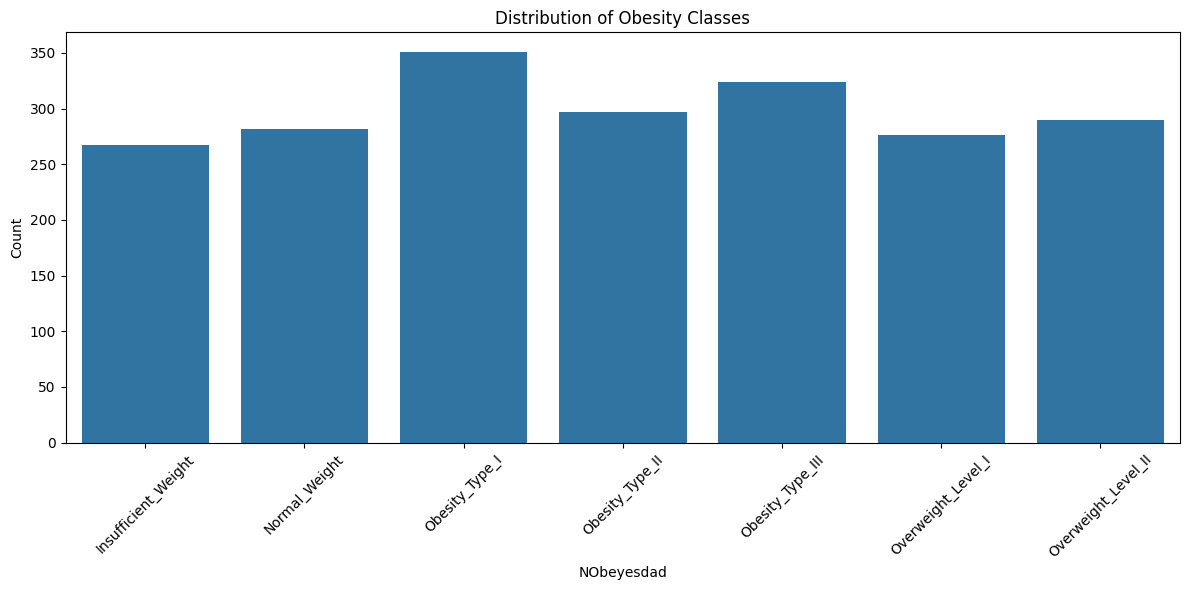

In [29]:
# Plot distribution of obesity classes
plt.figure(figsize=(12, 6))
obesity_counts = df["NObeyesdad"].value_counts().sort_index()
sns.barplot(x=obesity_counts.index, y=obesity_counts.values)
plt.title("Distribution of Obesity Classes")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.tight_layout()
plt.show()

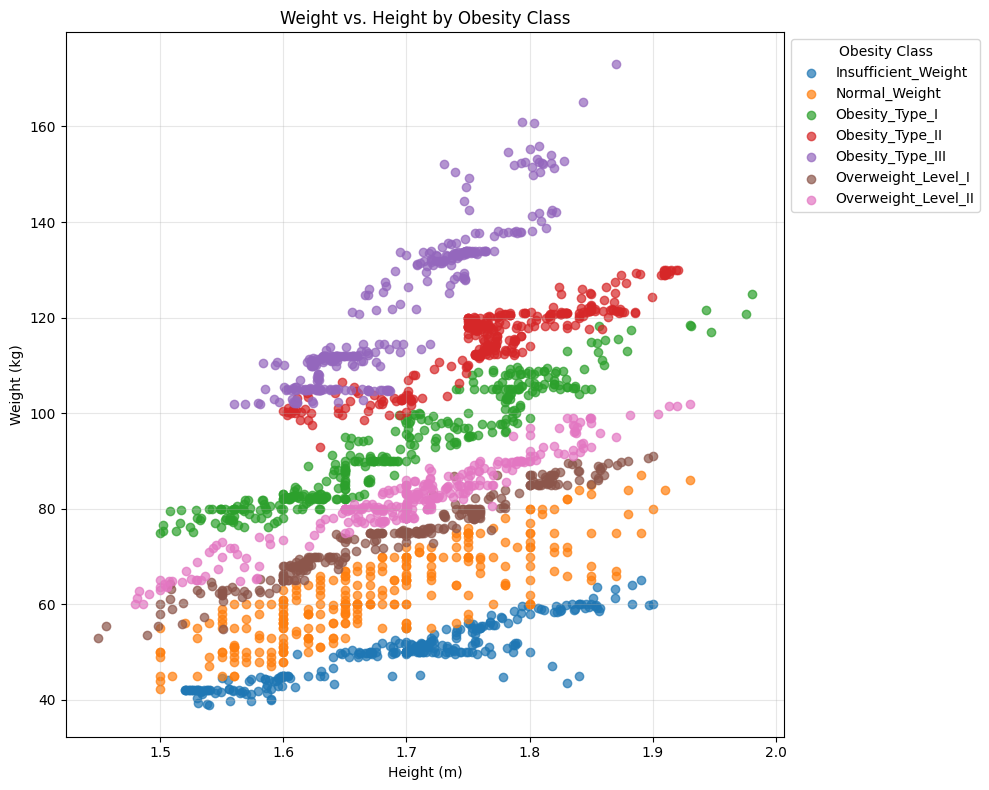

In [ ]:
# Weight vs. Height colored by obesity class
plt.figure(figsize=(10, 8))
for label, group in df.groupby("NObeyesdad"):
    plt.scatter(group["Height"], group["Weight"], label=label, alpha=0.7)
plt.title("Weight vs. Height by Obesity Class")
plt.xlabel("Height (m)")
plt.ylabel("Weight (kg)")
plt.legend(title="Obesity Class", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.grid(alpha=0.3)
plt.show()

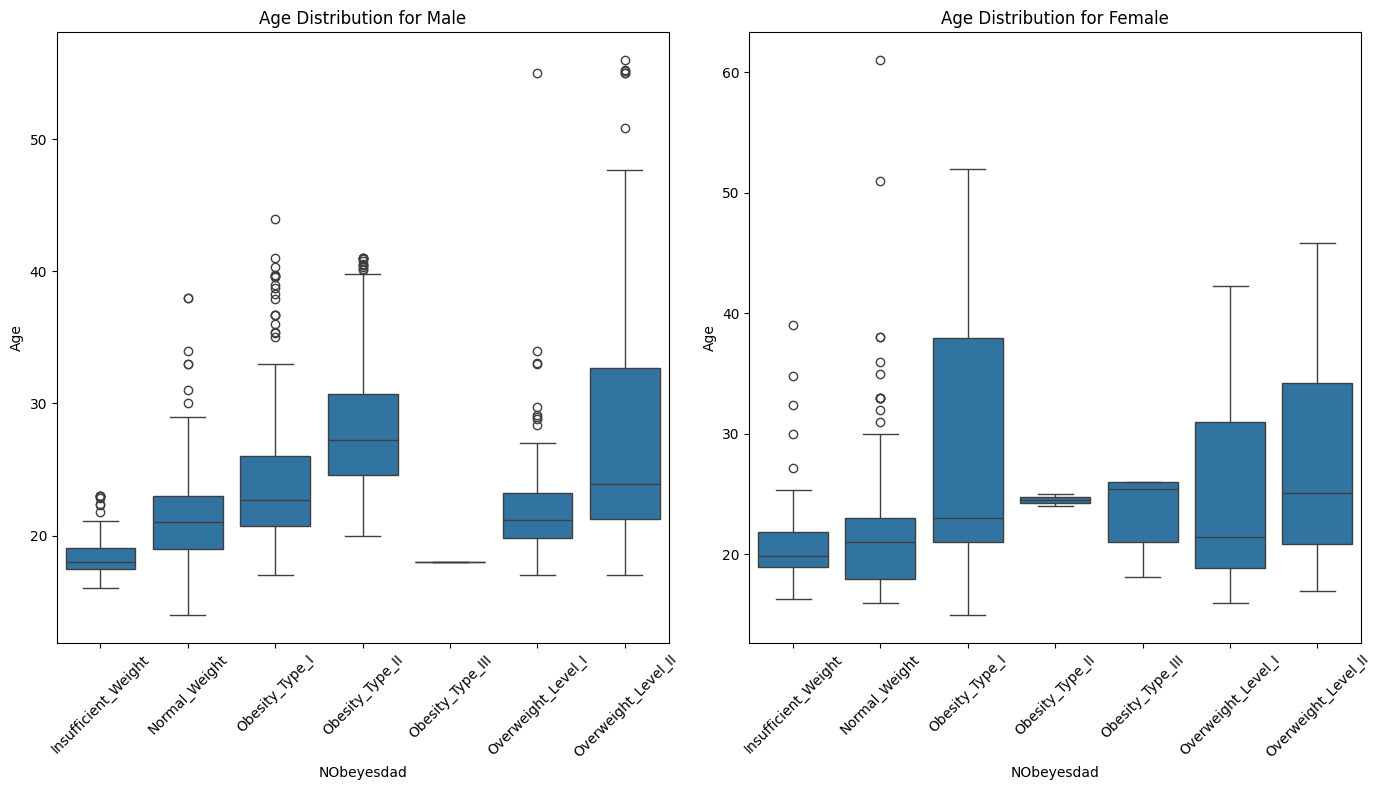

In [21]:
# Age distribution by gender and obesity class
plt.figure(figsize=(14, 8))
for i, gender in enumerate(["Male", "Female"]):
    plt.subplot(1, 2, i + 1)
    data = df[df["Gender"] == gender]
    sns.boxplot(
        x="NObeyesdad", y="Age", data=data, order=sorted(df["NObeyesdad"].unique())
    )
    plt.title(f"Age Distribution for {gender}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1400x800 with 0 Axes>

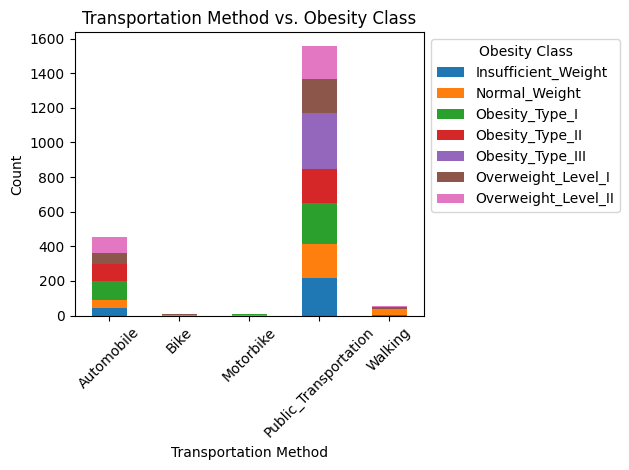

In [42]:
# Transportation method by obesity class
plt.figure(figsize=(14, 8))
pd.crosstab(df["MTRANS"], df["NObeyesdad"]).plot(kind="bar", stacked=True)
plt.title("Transportation Method vs. Obesity Class")
plt.xlabel("Transportation Method")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.legend(title="Obesity Class", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

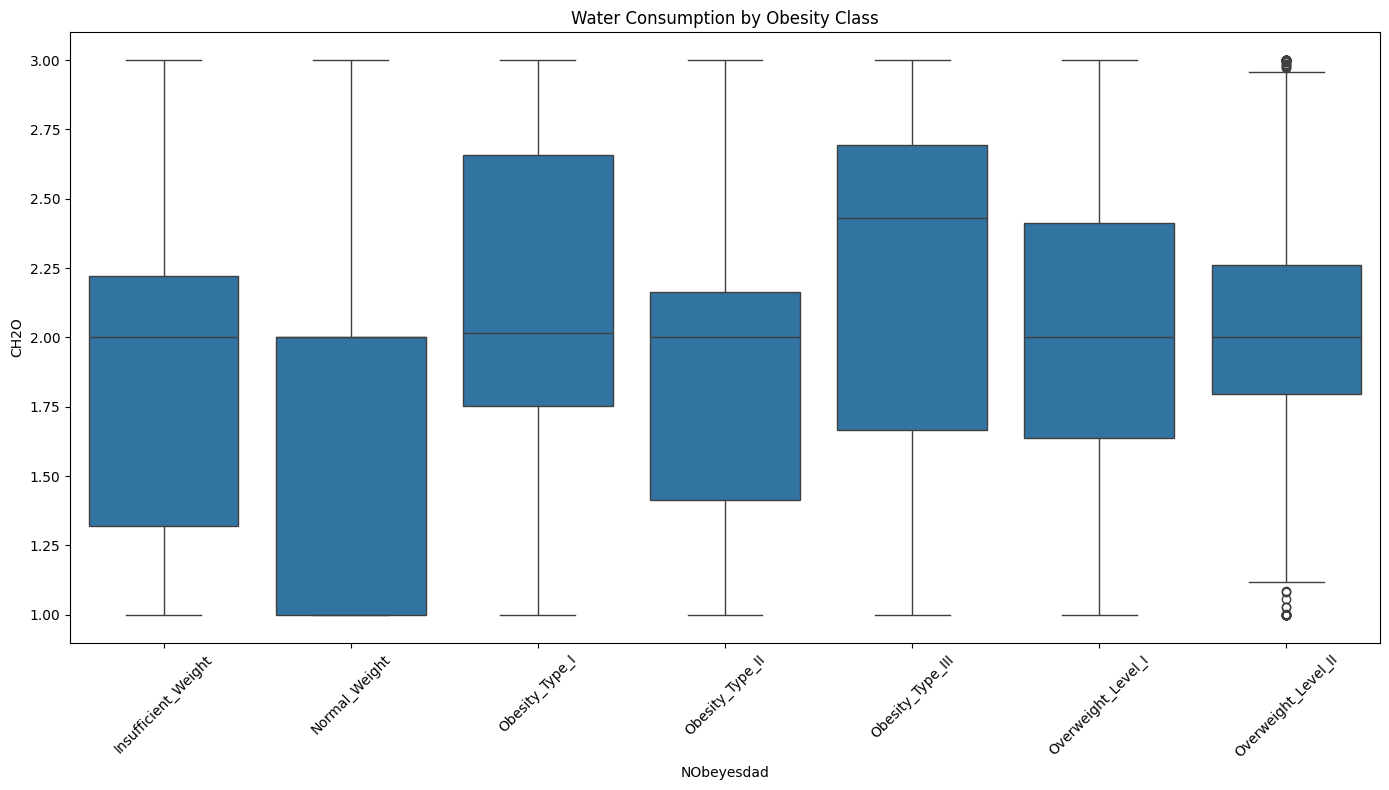

In [ ]:
# Water consumption by obesity class
plt.figure(figsize=(14, 8))
sns.boxplot(x="NObeyesdad", y="CH2O", data=df, order=sorted(df["NObeyesdad"].unique()))
plt.title("Water Consumption by Obesity Class")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

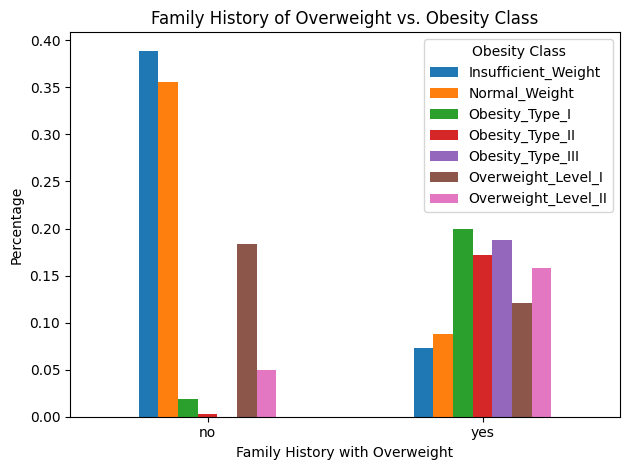

In [64]:
# Family history of overweight by obesity class
plt.figure(figsize=(12, 6))
family_obesity = pd.crosstab(
    df["family_history_with_overweight"], df["NObeyesdad"], normalize="index"
)
family_obesity.plot(kind="bar", stacked=False)
plt.title("Family History of Overweight vs. Obesity Class")
plt.xlabel("Family History with Overweight")
plt.ylabel("Percentage")
plt.xticks(rotation=0)
plt.legend(title="Obesity Class")
plt.tight_layout()
plt.show()

## Build Neural Network
